<a href="https://colab.research.google.com/github/augustolimald/cpa/blob/main/EFC1_GCC_253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Augusto César Rodrigues Lima

**Matricula**: 201910386

**Turma**: 14A

**Link do repositório GitHub:** https://github.com/augustolimald/cpa

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Funções Auxiliares



## Aumentar Recursão

O Google Collab estava dando erro para chamadas em arrays acima de 1000 elementos. A linha abaixo aumenta o threshold para que isso não aconteça

In [50]:
import sys
sys.setrecursionlimit(1500)


## Importações e Variáveis globais

In [35]:
import numpy as np

global_1=0

## Gerar Números Aleatórios

In [36]:
import random

def generateNumber():
  return random.randint(0, 1000)


def generateArray(size):
  array = []

  for i in range(size):
    array.append(generateNumber())

  return array

## Tempo de Execução

In [37]:
import time

def currentTime():
  return round(time.time() * 1000)

def calculateExecutionTime(array, algorithm):
  startTime = currentTime()
  orderedArray, comparasions = algorithm(array)
  endTime = currentTime()
  return (endTime - startTime, comparasions)

## Gerar Gráficos

In [38]:
import matplotlib.pyplot as plt

# Dataset Format
# [
#    {
#       label: 'string',
#       color: 'string',
#       xarray: [number],
#       yarray: [number]
#    } 
# ]

def generateGraph(title, xlabel, ylabel, dataset):
  for data in dataset:
    plt.plot(np.array(data['xarray']), np.array(data['yarray']), label=data['label'], color=data['color'])

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

def showIndividualAlgorithm(name, data, analysis):
  print(name + '\n')
  
  generateGraph(name, 'Array Size', 'Time (ms)', [
    {
      'label': 'Best Case',
      'color': 'green',
      'xarray': xdata,
      'yarray': data['bestCaseTimes']
    },
    {
      'label': 'Random Case',
      'color': 'blue',
      'xarray': xdata,
      'yarray': data['randomCaseTimes']
    },
    {
      'label': 'Worst Case',
      'color': 'red',
      'xarray': xdata,
      'yarray': data['worstCaseTimes']
    }
  ])

  print('')

  generateGraph(name, 'Array Size', 'Comparasions', [
    {
      'label': 'Best Case',
      'color': 'green',
      'xarray': xdata,
      'yarray': data['bestCaseComparasions']
    },
    {
      'label': 'Random Case',
      'color': 'blue',
      'xarray': xdata,
      'yarray': data['randomCaseComparasions']
    },
    {
      'label': 'Worst Case',
      'color': 'red',
      'xarray': xdata,
      'yarray': data['worstCaseComparasions']
    }
  ])

  print('\nAnálise Assintótica:', analysis)
  print('\n' + '-' * 50 + '\n')

def showMultipleAlgorithms(title, algorithmsNames, dataset, attributeName, ylabel):
  colors = ['blue', 'green', 'red', 'black', 'purple', 'pink', 'gray']

  data = []
  
  for i in range(len(dataset)):
    data.append({
      'label': algorithmsNames[i],
      'color': colors[i],
      'xarray': xdata,
      'yarray': dataset[i][attributeName]
    })

  generateGraph(title, 'Array Size', ylabel, data)
  print('\n\n')

# Funções de Ordenação




##  Insertion Sort


In [39]:
def insertionSort(originalArray):
  array = originalArray.copy()
  comparasions = 0

  for i in range(1, len(array)):
    comparasions += 1

    key = array[i]
    j = i - 1
    while j >= 0 and key < array[j]:
      comparasions += 1
      array[j + 1] = array[j]
      j -= 1
    comparasions += 1

    array[j + 1] = key

  comparasions += 1
  return (array, comparasions)

##  Merge Sort


In [40]:
def mergeSort(originalArray):
  array = originalArray.copy()

  def merge(array, comparasions):
    comparasions += 1

    if len(array) > 1:
      middle = len(array) // 2

      left = array[:middle]
      merge(left, comparasions)
      
      right = array[middle:]
      merge(right, comparasions)

      i = j = k = 0

      while i < len(left) and j < len(right):
        comparasions += 1        
        
        if left[i] < right[j]:
            array[k] = left[i]
            i += 1
        else:
            array[k] = right[j]
            j += 1
        comparasions += 1
        k += 1
      comparasions += 1

      while i < len(left):
        comparasions += 1
        array[k] = left[i]
        i += 1
        k += 1
      comparasions += 1

      while j < len(right):
        comparasions += 1
        array[k] = right[j]
        j += 1
        k += 1
      comparasions += 1
    
    return comparasions

  comparasions = 0
  comparasions = merge(array, comparasions)
  return (array, comparasions)

##  Selection Sort


In [41]:
def selectionSort(originalArray):
  array = originalArray.copy()
  comparasions = 0

  for i in range(len(array)):
    comparasions += 1
    min = i
    for j in range(i+1, len(array)):
      comparasions += 1
      if array[min] > array[j]:
          min = j
      comparasions += 1
    array[i], array[min] = array[min], array[i]
  comparasions += 1

  return (array, comparasions)

##  Bubble Sort


In [42]:
def bubbleSort(originalArray):
  array = originalArray.copy()
  
  comparasions = 0
  n = len(array)
  changed = True

  for i in range(n):
    comparasions += 1

    comparasions += 1
    if changed:
      changed = False
      
      for j in range(0, n - i - 1):
        comparasions += 1

        if array[j] > array[j + 1]:
          array[j], array[j+1] = array[j+1], array[j]
          changed = True
        comparasions += 1

      comparasions += 1
    else:
      break

  comparasions += 1

  return (array, comparasions)

## Heap Sort

In [43]:
def heapSort(originalArray):
  array = originalArray.copy()

  def heapify(array, n, i, comparasions):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
  
    if left < n and array[largest] < array[left]:
      largest = left
    comparasions += 1

    if right < n and array[largest] < array[right]:
      largest = right
    comparasions += 1
  
    if largest != i:
      array[i], array[largest] = array[largest], array[i]
      comparasions = heapify(array, n, largest, comparasions)
    comparasions += 1
    
    return comparasions
  
  n = len(array)
  comparasions = 0

  for i in range(n // 2 - 1, -1, -1):
    comparasions += 1
    comparasions = heapify(array, n, i, comparasions)
  comparasions += 1

  for i in range(n-1, 0, -1):
    comparasions += 1
    array[i], array[0] = array[0], array[i]
    comparasions = heapify(array, i, 0, comparasions)
  comparasions += 1
  
  return (array, comparasions)

a = [5, 1, 7, 9, 3, 2, 6, 4]
print(heapSort(a))

([1, 2, 3, 4, 5, 6, 7, 9], 79)


## Quick Sort

> pivo = *A[A-comprimento]*

In [44]:
def quickSort(originalArray):
  array = originalArray.copy()

  def partition(array, low, high, comparasions):
    pivot = array[high]
    i = low - 1
    
    for j in range(low, high):
      comparasions += 1

      if array[j] <= pivot:
        comparasions += 1
        i = i + 1
        array[i], array[j] = array[j], array[i]
    comparasions += 1

    array[i + 1], array[high] = array[high], array[i + 1]
    
    return i + 1, comparasions
  
  def sort(array, low, high, comparasions):
    comparasions += 1
    if low < high:
      pivot, comparasions = partition(array, low, high, comparasions)
      comparasions = sort(array, low, pivot - 1, comparasions)
      comparasions = sort(array, pivot + 1, high, comparasions)
    return comparasions

  comparasions = 0
  comparasions = sort(array, 0, len(array) - 1, comparasions)
  return (array, comparasions)

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



# Solução

## Quick Sort com Pivô Aleatório

In [45]:
def randomQuickSort(originalArray):
  array = originalArray.copy()
  
  def randomPartition(array, start, stop, comparasions):
    randomPivot = random.randrange(start, stop)
    array[start], array[randomPivot] = array[randomPivot], array[start]
    return partition(array, start, stop, comparasions)
  
  def partition(array, start, stop, comparasions):
    pivot = start
    i = start + 1 
    
    for j in range(start + 1, stop + 1):
      comparasions += 1
      if array[j] <= array[pivot]:
        array[i], array[j] = array[j], array[i]
        i = i + 1
      comparasions += 1
    comparasions += 1

    array[pivot] , array[i - 1] = array[i - 1] , array[pivot]
    pivot = i - 1
    return pivot, comparasions

  def sort(array, start, stop, comparasions):
    if(start < stop):
      comparasions += 1
      pivot, comparasions = randomPartition(array, start, stop, comparasions)
      comparasions = sort(array, start, pivot-1, comparasions)
      comparasions = sort(array, pivot + 1, stop, comparasions)
    return comparasions

  comparasions = 0
  comparasions = sort(array, 0, len(array) - 1, comparasions)
  return array, comparasions

a = [5, 3, 7, 1, 0, 2, 9, 8]
print(randomQuickSort(a))

([0, 1, 2, 3, 5, 7, 8, 9], 38)


## Estrutura de Dados

In [46]:
def createAlgorithmDataStructure():
  return { 
      'bestCaseTimes': [], 
      'bestCaseComparasions': [],
      'randomCaseTimes': [], 
      'randomCaseComparasions': [],
      'worstCaseTimes': [], 
      'worstCaseComparasions': []
  }

algorithmsNames = [
  'Insertion Sort',
  'Merge Sort',
  'Selection Sort',
  'Bubble Sort',
  'Heap Sort',
  'Quick Sort',
  'Random Quick Sort',
]

algorithmsFunctions = [
  insertionSort,
  mergeSort,
  selectionSort,
  bubbleSort,
  heapSort,
  quickSort,
  randomQuickSort
]

algorithmsAnalysis = [
  'Ω(n), θ(n²)',         
  'O(n log n)',
  'O(n²)',
  'Ω(n), θ(n²)',
  'O(n lg n)',
  'Ω(n), θ(n log n), O(n²)',
  'O(n log n)'
]

## Processamento

In [51]:
def fillAlgorithmData(algorithm, data, bestArray, randomArray, worstArray):
  timing, comparasions = calculateExecutionTime(bestArray, algorithm)
  data['bestCaseTimes'].append(timing)
  data['bestCaseComparasions'].append(comparasions)

  timing, comparasions = calculateExecutionTime(randomArray, algorithm)
  data['randomCaseTimes'].append(timing)
  data['randomCaseComparasions'].append(comparasions)

  timing, comparasions = calculateExecutionTime(worstArray, algorithm)
  data['worstCaseTimes'].append(timing)
  data['worstCaseComparasions'].append(comparasions)

xdata = []

algorithmsData = [ createAlgorithmDataStructure() for name in algorithmsNames ]

for arraySize in range(5, 1000, 5):
  xdata.append(arraySize)

  randomArray = generateArray(arraySize)
  
  orderedArray = randomArray.copy()
  orderedArray.sort()
  
  reversedArray = orderedArray.copy()
  reversedArray.reverse()

  for i in range(len(algorithmsNames)):
    if algorithmsNames[i] == 'Quick Sort':
      fillAlgorithmData(algorithmsFunctions[i], algorithmsData[i], randomArray, reversedArray, orderedArray)
    else:
      fillAlgorithmData(algorithmsFunctions[i], algorithmsData[i], randomArray, orderedArray, reversedArray)
      

## Output

a) Algoritmos de Ordenação


Insertion Sort



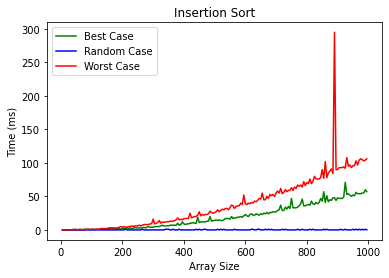

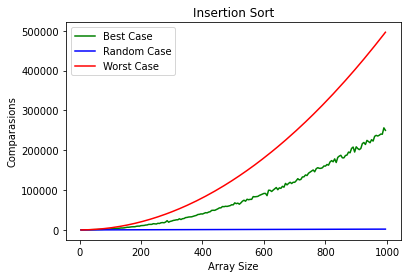


Análise Assintótica: Ω(n), θ(n²)

--------------------------------------------------

Merge Sort



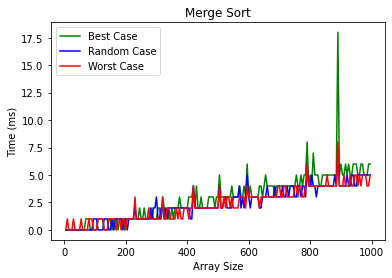

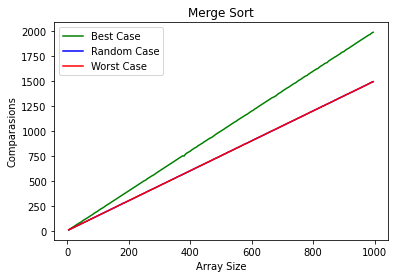


Análise Assintótica: O(n log n)

--------------------------------------------------

Selection Sort



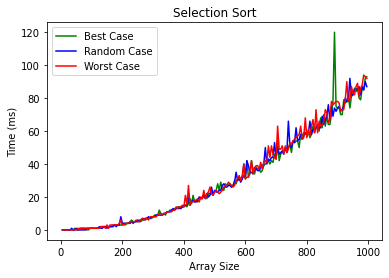

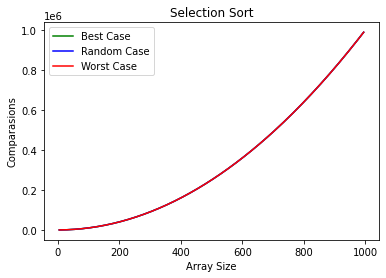


Análise Assintótica: O(n²)

--------------------------------------------------

Bubble Sort



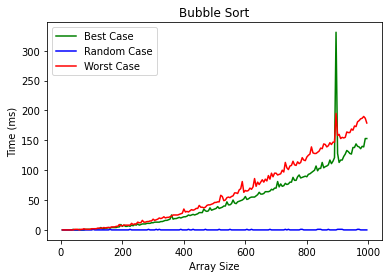

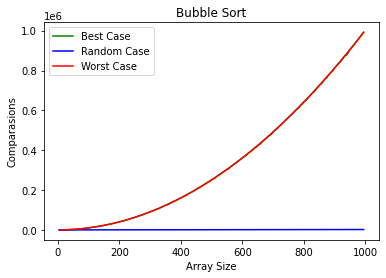


Análise Assintótica: Ω(n), θ(n²)

--------------------------------------------------

Heap Sort



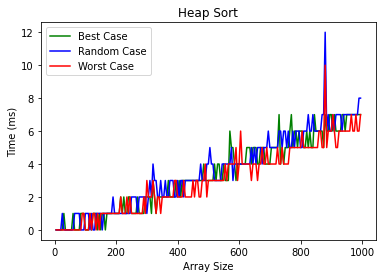

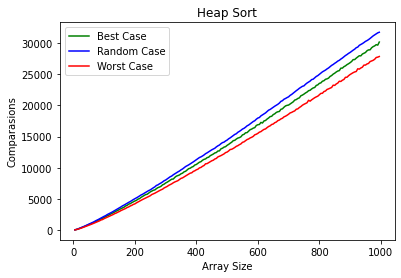


Análise Assintótica: O(n lg n)

--------------------------------------------------

Quick Sort



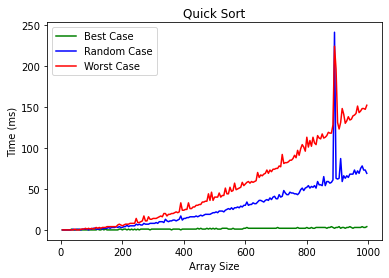

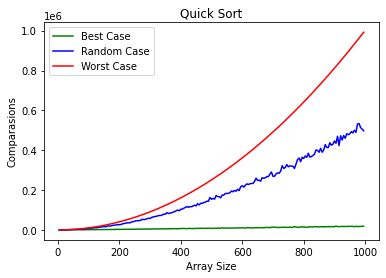


Análise Assintótica: Ω(n), θ(n log n), O(n²)

--------------------------------------------------

Random Quick Sort



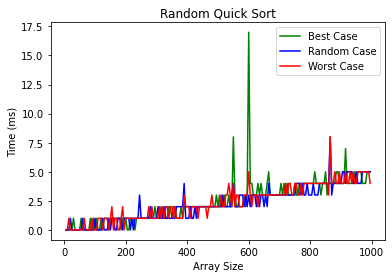

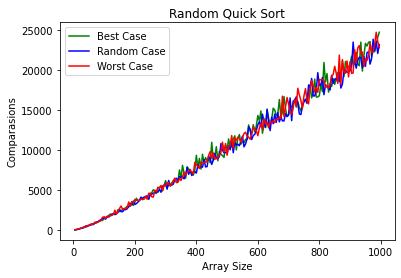


Análise Assintótica: O(n log n)

--------------------------------------------------


b)Comparação



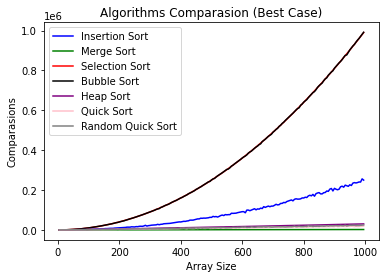

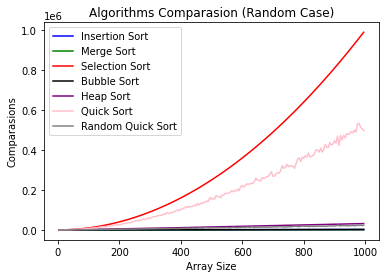

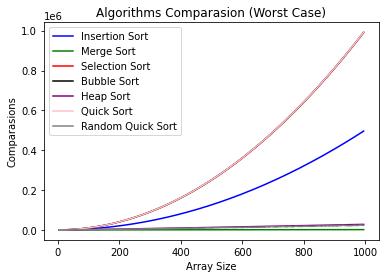




c) Tipos de Quick Sort



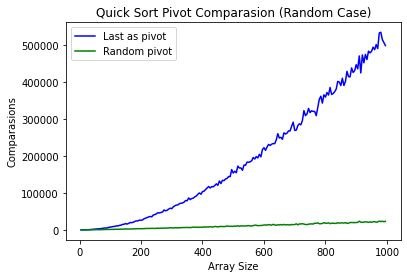

In [52]:
print('a) Algoritmos de Ordenação\n\n')

for i in range(len(algorithmsNames)):
  showIndividualAlgorithm(algorithmsNames[i], algorithmsData[i], algorithmsAnalysis[i])

print('\nb)Comparação\n')

showMultipleAlgorithms('Algorithms Comparasion (Best Case)', algorithmsNames, algorithmsData, 'bestCaseComparasions', 'Comparasions')
showMultipleAlgorithms('Algorithms Comparasion (Random Case)', algorithmsNames, algorithmsData, 'randomCaseComparasions', 'Comparasions')
showMultipleAlgorithms('Algorithms Comparasion (Worst Case)', algorithmsNames, algorithmsData, 'worstCaseComparasions', 'Comparasions')

print('c) Tipos de Quick Sort\n')

quickSortIndex = algorithmsNames.index('Quick Sort')
showMultipleAlgorithms('Quick Sort Pivot Comparasion (Random Case)', ['Last as pivot', 'Random pivot'], [algorithmsData[quickSortIndex], algorithmsData[quickSortIndex + 1]], 'randomCaseComparasions', 'Comparasions')
